In [31]:
import pandas as pd
table_2023_2024 = pd.read_html("https://fbref.com/es/comps/31/horario/Resultados-y-partidos-en-Liga-MX",encoding='UTF-8')
table_2022_2023 = pd.read_html("https://fbref.com/es/comps/31/2022-2023/horario/Marcadores-y-partidos-de-2022-2023-Liga-MX", encoding='UTF-8')
table_2021_2022 = pd.read_html("https://fbref.com/es/comps/31/2021-2022/horario/Marcadores-y-partidos-de-2021-2022-Liga-MX", encoding='UTF-8')
table_2020_2021 = pd.read_html("https://fbref.com/es/comps/31/2020-2021/horario/Marcadores-y-partidos-de-2020-2021-Liga-MX", encoding='UTF-8')
table_2019_2020 = pd.read_html("https://fbref.com/es/comps/31/2019-2020/horario/Marcadores-y-partidos-de-2019-2020-Liga-MX", encoding='UTF-8')

In [32]:
table_2023_2024 = table_2023_2024[0]
table_2022_2023 = table_2022_2023[0]
table_2021_2022 = table_2021_2022[0]
table_2020_2021 = table_2020_2021[0]
table_2019_2020 = table_2019_2020[0]

In [33]:
df = [table_2019_2020,table_2020_2021,table_2021_2022,table_2022_2023,table_2023_2024]
datas_historicos_ligamx = pd.concat(df)

In [34]:
# Dividir la columna 'Marcador' en dos columnas 'Local' y 'Visitante'
datas_historicos_ligamx[['Goles Local', 'Goles Visitante']] = datas_historicos_ligamx['Marcador'].str.split('–', expand=True)

# Eliminar la columna original 'Marcador' si ya no la necesitas
datas_historicos_ligamx = datas_historicos_ligamx.drop('Marcador', axis=1)


In [35]:
import re
def extraer_numero(cadena):
    numeros = re.findall(r'\b\d+\b', str(cadena))
    if numeros:
        return int(numeros[0])
    else:
        return None

In [36]:
datas_historicos_ligamx['Goles Local'] = datas_historicos_ligamx['Goles Local'].apply(extraer_numero).fillna(0).astype(int)
datas_historicos_ligamx['Goles Visitante'] = datas_historicos_ligamx['Goles Visitante'].apply(extraer_numero).fillna(0).astype(int)

In [37]:
indices_a_eliminar = [indice for indice, valor in datas_historicos_ligamx['Ronda'].iteritems() if pd.isna(valor)]
datas_historicos_ligamx = datas_historicos_ligamx.drop(indices_a_eliminar)

In [38]:
df = datas_historicos_ligamx.reset_index(drop=True)
df

,Ronda,Sem.,Día,Fecha,Hora,Local,xG,xG.1,Visitante,Asistencia,Sedes,Árbitro,Informe del partido,Notas,Goles Local,Goles Visitante
0,Temporada Regular Apertura 2019,1.0,Sáb,2019-07-20,17:00,Atlético,1.4,2.2,UNAM,25103.0,Estadio Alfonso Lastras Ramírez,Diego Montaño,Informe del partido,NaN,0,2
1,Temporada Regular Apertura 2019,1.0,Sáb,2019-07-20,17:00,Pachuca,2.8,1.8,León,21240.0,Estadio Hidalgo,Adonai Escobedo,Informe del partido,NaN,1,3
2,Temporada Regular Apertura 2019,1.0,Vie,2019-07-19,19:00,Puebla,1.1,1.4,Tijuana,15080.0,Estadio Cuauhtémoc,Luis Santander,Informe del partido,NaN,1,3
3,Temporada Regular Apertura 2019,1.0,Vie,2019-07-19,21:00,Atlas,1.0,1.5,FC Juárez,28893.0,Estadio Jalisco,Alfredo Peñaloza,Informe del partido,NaN,1,0
4,Temporada Regular Apertura 2019,1.0,Dom,2019-07-21,12:00,Toluca,0.7,1.5,Querétaro,13015.0,Estadio Nemesio Díez,Marco Antonio Nava,Informe del partido,NaN,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1207,Clausura 2024 Temporada Regular,17,Vie,2024-04-26,20:00,Puebla,NaN,NaN,América,NaN,NaN,NaN,Cara a cara,NaN,0,0
1208,Clausura 2024 Temporada Regular,17,Vie,2024-04-26,22:00,Querétaro,NaN,NaN,UNAM,NaN,NaN,NaN,Cara a cara,NaN,0,0
1209,Clausura 2024 Temporada Regular,17,Sáb,2024-04-27,22:00,Atlas,NaN,NaN,Guadalajara,NaN,NaN,NaN,Cara a cara,NaN,0,0
1210,Clausura 2024 Temporada Regular,17,Dom,2024-04-28,19:00,Necaxa,NaN,NaN,Monterrey,NaN,NaN,NaN,Cara a cara,NaN,0,0


In [39]:
df = df[(df['Local']=='Querétaro') & (df['Visitante']=='Necaxa')]
df

,Ronda,Sem.,Día,Fecha,Hora,Local,xG,xG.1,Visitante,Asistencia,Sedes,Árbitro,Informe del partido,Notas,Goles Local,Goles Visitante
74,Temporada Regular Apertura 2019,11.0,Mar,2019-09-24,19:00,Querétaro,1.1,0.8,Necaxa,16975.0,Estadio La Corregidora,Fernando Hernández,Informe del partido,NaN,1,2
132,Cuartos de final,NaN,Sáb,2019-11-30,21:05,Querétaro,1.6,0.8,Necaxa,23827.0,Estadio La Corregidora,Fernando Hernández,Informe del partido,Llave 2 de 2; Necaxa ganó,2,3
334,Temporada regular del Guardianes 2020,15,Sáb,2020-10-24,17:00,Querétaro,1.0,0.4,Necaxa,NaN,Estadio La Corregidora,Oscar Mejia,Informe del partido,NaN,0,1
539,Apertura 2021 - Temporada regular,8,Dom,2021-09-12,19:00,Querétaro,0.4,1.1,Necaxa,5704,Estadio La Corregidora,Fernando Hernández,Informe del partido,NaN,3,0
744,Apertura 2022 Temporada Regular,2.0,Dom,2022-07-10,17:00,Querétaro,1.0,1.9,Necaxa,NaN,Estadio La Corregidora,Fernando Guerrero,Informe del partido,NaN,1,2


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


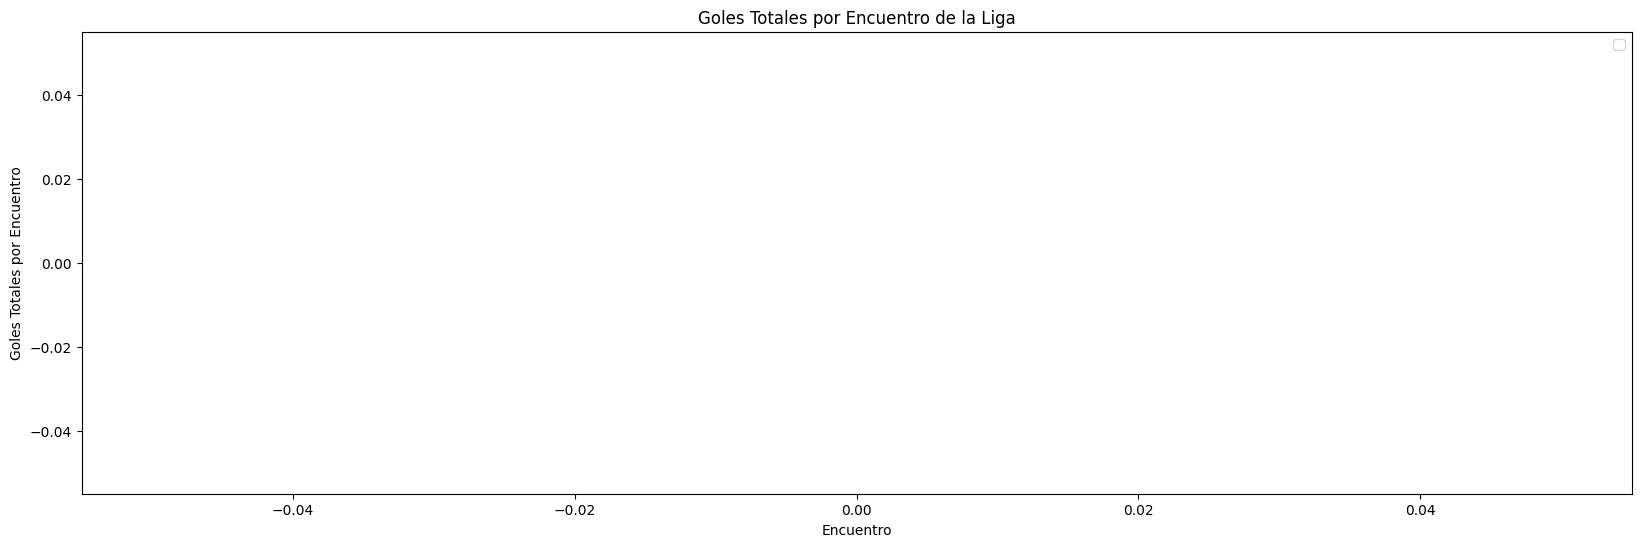

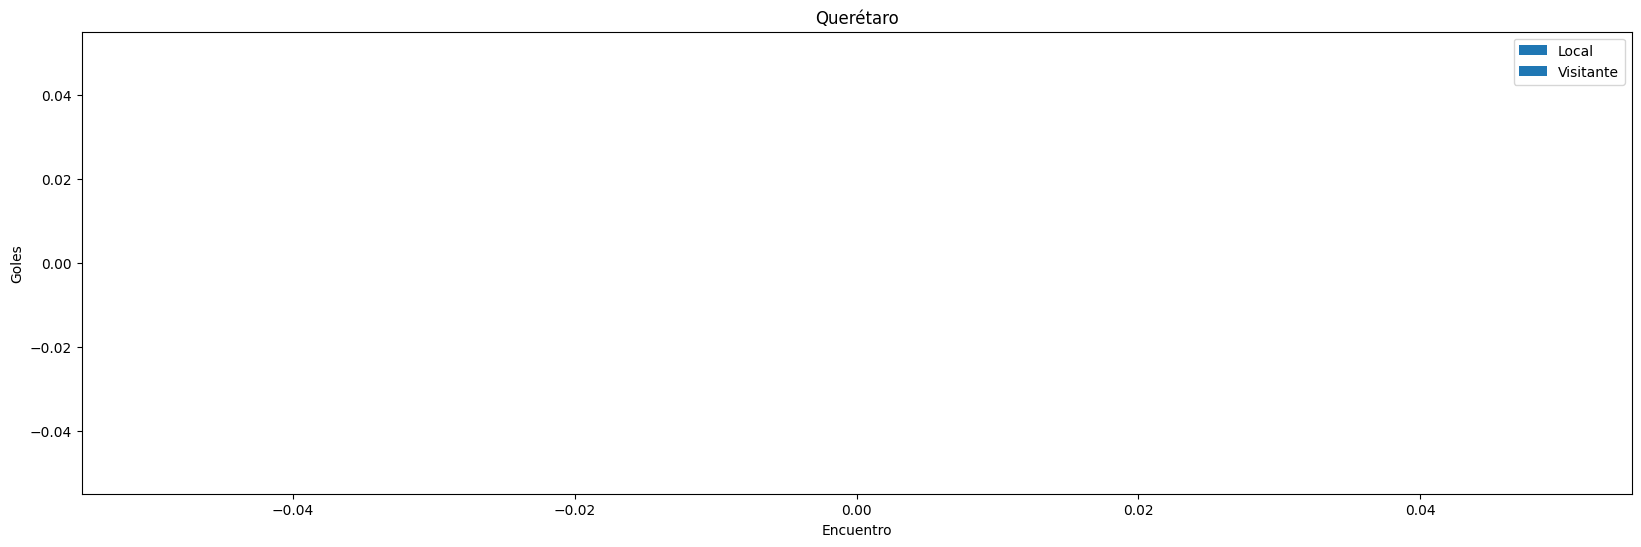

In [15]:
from graficas import GraficasFutbol

# Crear una instancia de la clase y llamar a las funciones
graficas = GraficasFutbol(df,'Querétaro','Local')

graficas.grafica_total_goles()
graficas.grafica_local_visita()

In [20]:
datas_historicos_ligamx[datas_historicos_ligamx['Visitante']=='UNAM'].reset_index(drop=True)

,Ronda,Sem.,Día,Fecha,Hora,Local,xG,xG.1,Visitante,Asistencia,Sedes,Árbitro,Informe del partido,Notas,Goles Local,Goles Visitante
0,Apertura 2021 - Temporada regular,2,Sáb,2021-07-31,21:00,Monterrey,1.9,0.6,UNAM,20943,Estadio BBVA Bancomer,Adonai Escobedo,Informe del partido,NaN,2,0
1,Apertura 2021 - Temporada regular,5,Mar,2021-08-17,21:00,Necaxa,1.4,0.6,UNAM,9242,Estadio Victoria de Aguascalientes,Eduardo Basulto,Informe del partido,NaN,3,0
2,Apertura 2021 - Temporada regular,7,Dom,2021-08-29,12:00,Toluca,2.5,1.3,UNAM,9566,Estadio Nemesio Díez,César Arturo Ramos,Informe del partido,NaN,2,1
3,Apertura 2021 - Temporada regular,9,Sáb,2021-09-18,20:00,Mazatlán,1.2,2.0,UNAM,7902,Estadio de Mazatlán,Erick Miranda,Informe del partido,NaN,2,2
4,Apertura 2021 - Temporada regular,12,Dom,2021-10-03,17:00,América,1.3,0.8,UNAM,27571,Estadio Azteca,Jorge Pérez,Informe del partido,NaN,2,0
5,Apertura 2021 - Temporada regular,14,Mié,2021-10-20,19:00,León,2.5,0.9,UNAM,12333,Estadio León,Erick Miranda,Informe del partido,NaN,1,2
6,Apertura 2021 - Temporada regular,16,Sáb,2021-10-30,20:06,Pachuca,2.5,0.7,UNAM,6887,Estadio Hidalgo,Fernando Guerrero,Informe del partido,NaN,1,1
7,Reclasificación,NaN,Dom,2021-11-21,17:00,Toluca,1.9,1.6,UNAM,22595,Estadio Nemesio Díez,Fernando Hernández,Informe del partido,NaN,1,2
8,Cuartos de final,NaN,Sáb,2021-11-27,19:00,América,2.0,1.7,UNAM,51302,Estadio Azteca,Marco Ortíz,Informe del partido,Llave 2 de 2; UNAM ganó,1,3
9,Semifinales,NaN,Dom,2021-12-05,19:00,Atlas,2.1,0.9,UNAM,42962,Estadio Jalisco,Jorge Pérez,Informe del partido,Llave 2 de 2; Atlas ganó,0,1


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


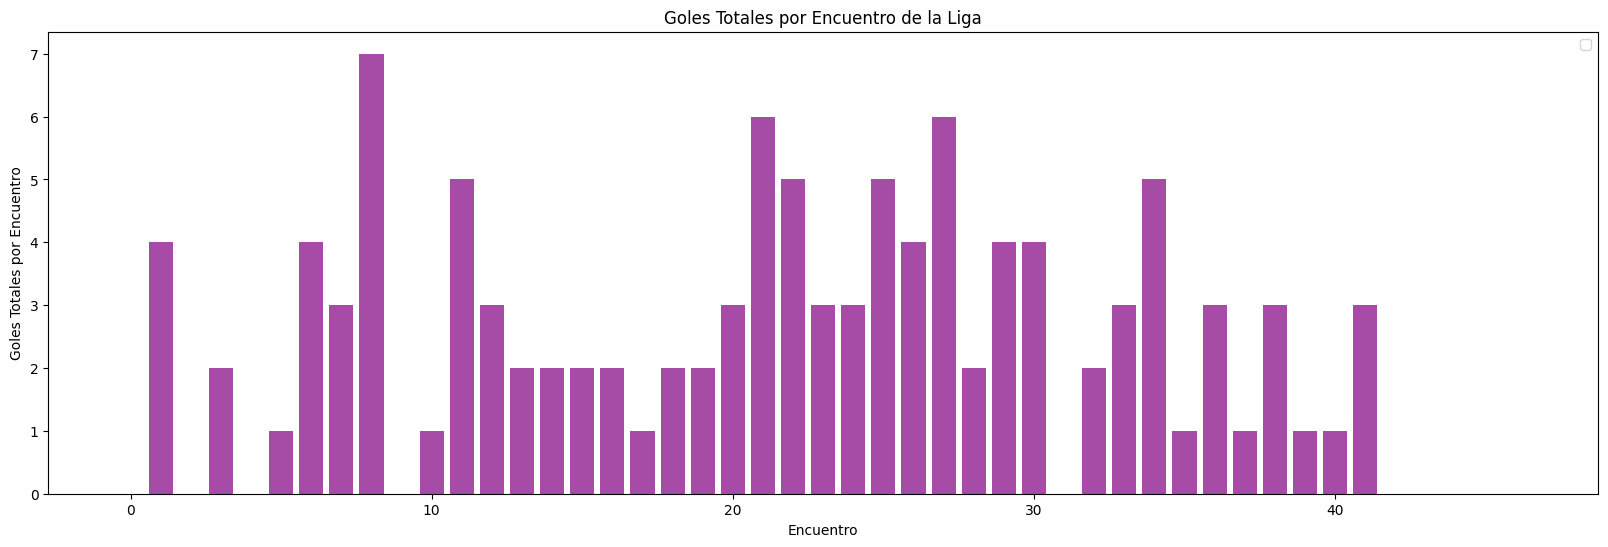

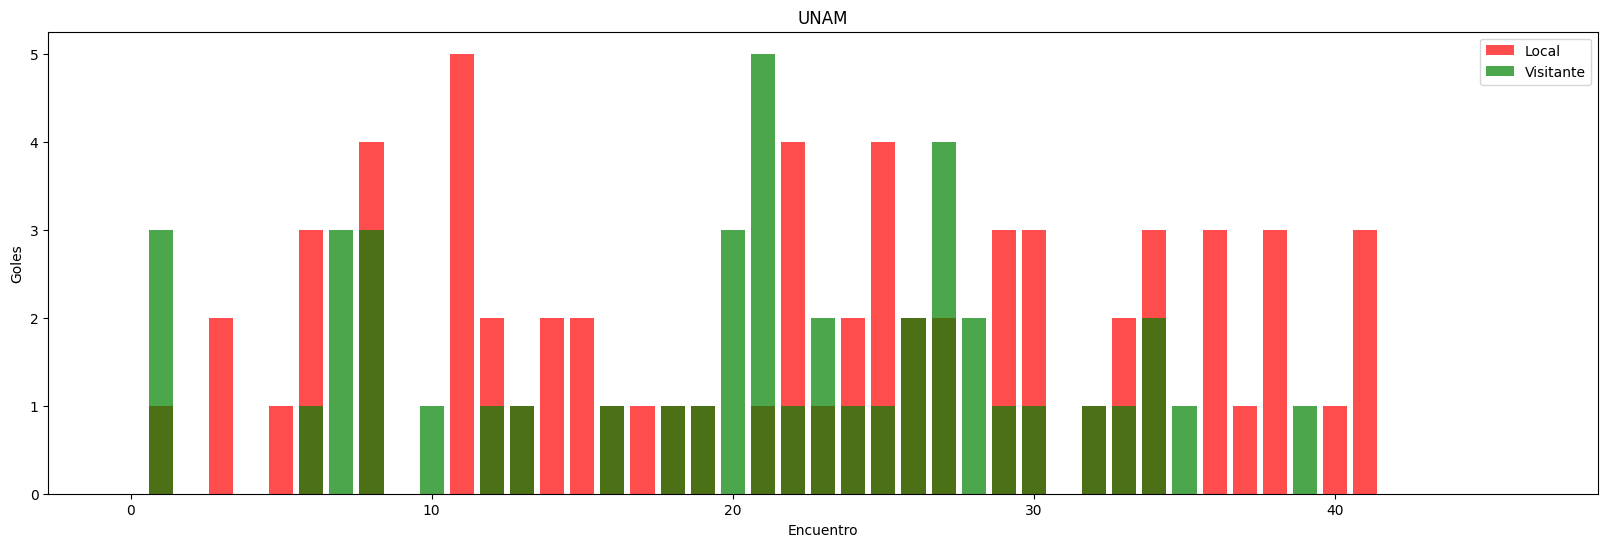

In [21]:
# Crear una instancia de la clase y llamar a las funciones
graficas = GraficasFutbol(datas_historicos_ligamx,'UNAM','Local')

graficas.grafica_total_goles()
graficas.grafica_local_visita()

In [15]:
df1 = df[((df['Local']=='Puebla') & (df['Visitante']=='Toluca')) | ((df['Local']=='Toluca') & (df['Visitante']=='Puebla')) ]
df1

,Ronda,Sem.,Día,Fecha,Hora,Local,xG,xG.1,Visitante,Asistencia,Sedes,Árbitro,Informe del partido,Notas,Goles Local,Goles Visitante
122,Apertura 2021 - Temporada regular,17,Vie,2021-11-05,19:00,Puebla,1.9,1.2,Toluca,16136,Estadio Cuauhtémoc,Jorge Pérez,Informe del partido,NaN,1,0
225,Clausura 2022 - Temporada regular,12,Dom,2022-04-03,12:00,Toluca,1.1,1.4,Puebla,9215,Estadio Nemesio Díez,Fernando Hernández,Informe del partido,NaN,2,1
339,Apertura 2022 Temporada Regular,16.0,Mar,2022-08-02,20:00,Toluca,1.3,1.0,Puebla,17402.0,Estadio Nemesio Díez,Victor Caceres,Informe del partido,NaN,1,1
691,Apertura 2023 Temporada regular,15,Mar,2023-10-31,19:00,Toluca,1.2,1.4,Puebla,23808,Estadio Nemesio Díez,Óscar Macias,Informe del partido,NaN,0,1
748,Clausura 2024 Temporada Regular,3,Vie,2024-01-26,19:00,Puebla,NaN,NaN,Toluca,NaN,Estadio Cuauhtémoc,NaN,Cara a cara,NaN,0,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


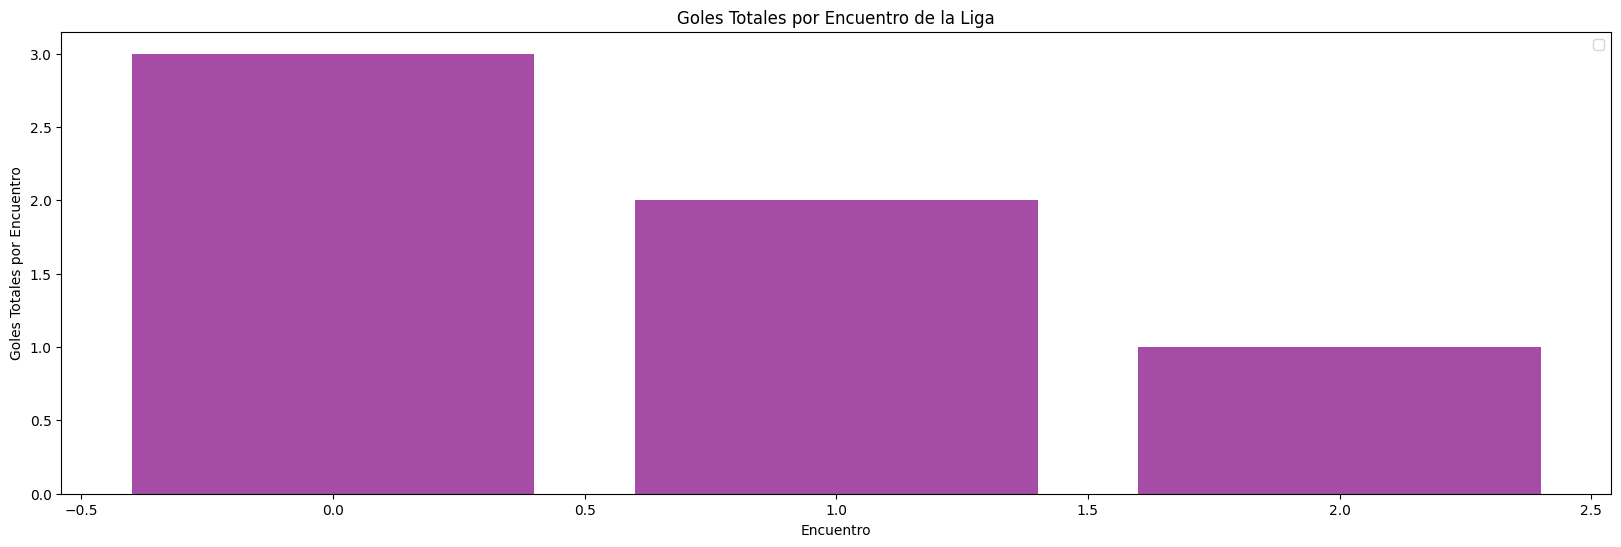

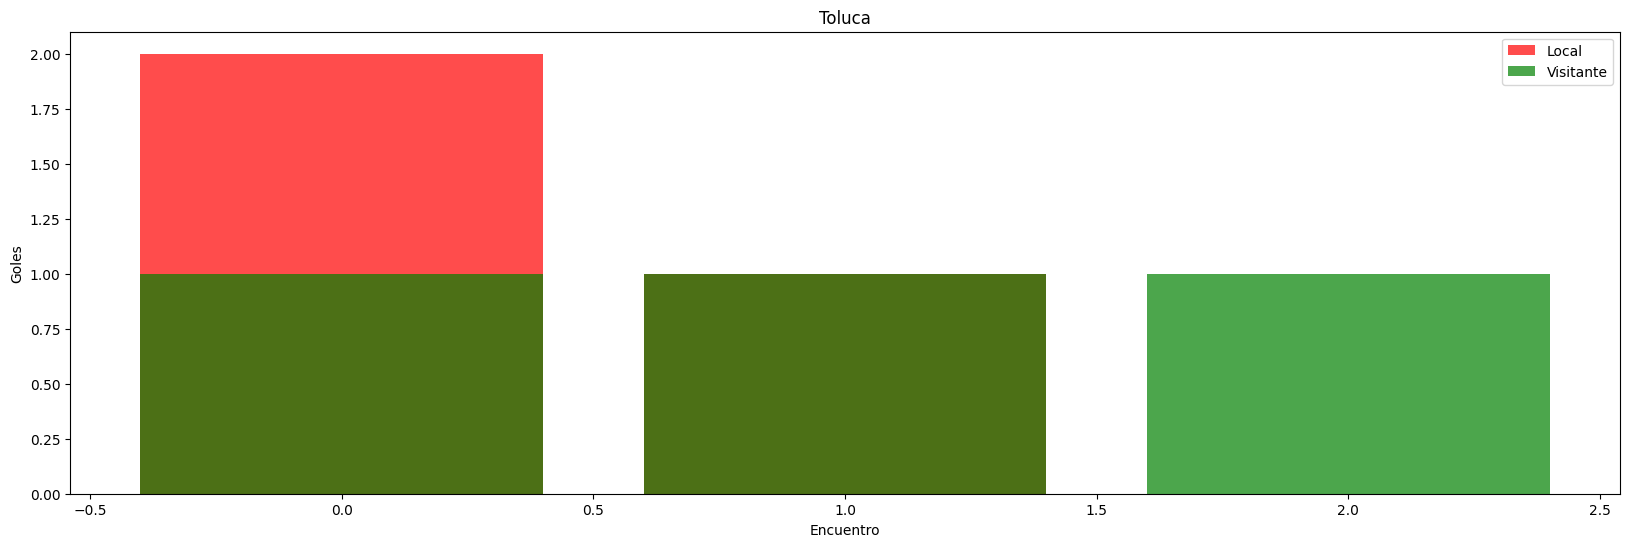

In [18]:
graficas = GraficasFutbol(df1,'Toluca','Local')

graficas.grafica_total_goles()
graficas.grafica_local_visita()

In [24]:
len(df[(df['Día']=='Vie') & (df['Goles Local'] != df['Goles Visitante'])])/len(df[df['Día']=='Vie'])

158

In [39]:
len(df[(df['Día']=='Vie')& (df['Goles Local']+df['Goles Visitante']<=2)])/len(df[df['Día']=='Vie'])

0.5759493670886076

In [31]:
df['Goles Local']+df['Goles Visitante']

0      0
1      4
2      3
3      4
4      0
      ..
847    0
848    0
849    0
850    0
851    0
Length: 852, dtype: int64

In [43]:
datas_historicos_ligamx = datas_historicos_ligamx.to_excel("datosligamx.xlsx" ,index=False, encoding='UTF-8')